In [1]:
import sys

print(sys.executable)


/jup/.venv/bin/python3


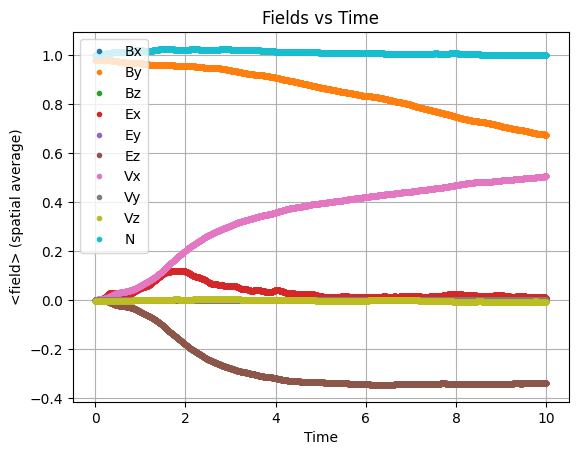

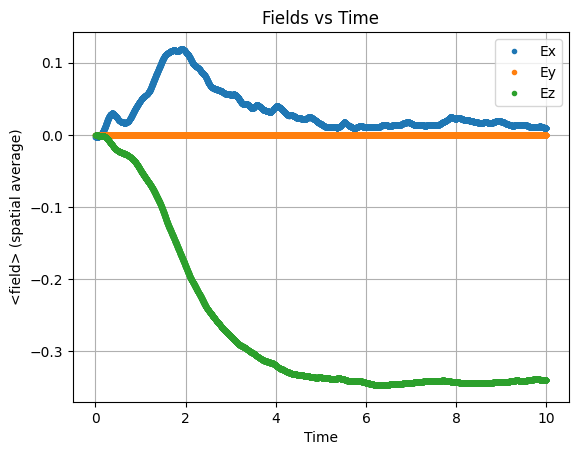

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = "fields.h5"

times = []
fields_names = ["Bx", "By", "Bz", "Ex", "Ey", "Ez", "Vx", "Vy", "Vz", "N"]
fields_arrays = [[], [], [], [], [], [], [], [], [], [], []]

with h5py.File("fields.h5", "r") as f:
    t_group = f["/t"]
    for time_str in sorted(t_group.keys()):
        times.append(float(time_str))
        for i, name in enumerate(fields_names):
            load = f[f"/t/{time_str}/{name}"][()]
            fields_arrays[i].append(np.mean(load))

# Plot
for i in range(len(fields_names)):
    plt.plot(times, fields_arrays[i], '.', label=fields_names[i])
plt.xlabel("Time")
plt.ylabel("<field> (spatial average)")
plt.title("Fields vs Time")
plt.legend()
plt.grid(True)
plt.show()

for i in range(3, 6):
    plt.plot(times, fields_arrays[i], '.', label=fields_names[i])
plt.xlabel("Time")
plt.ylabel("<field> (spatial average)")
plt.title("Fields vs Time")
plt.legend()
plt.grid(True)
plt.show()

We can see that the electric and magnetic fields remain stable (?) throughout the simulation, and the total density remains constant and equal to 1. 